### Expressing the annual average solar exposition for a given latitude

In [29]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [30]:
# plt.style.use('dark_background')

In [31]:
def daily_exposure(O, phi, tau = 0.409, different_bounds = False):
    delta = tau * np.sin(O)
    T = -np.tan(delta)*np.tan(phi)
    t0 = 0
    # Check if we have midnight sun or polar night
    if np.abs(T) >= 1:
        if np.sign(delta)*np.sign(phi) == 1:
            t0 = np.pi
        elif np.sign(delta)*np.sign(phi) == -1:
            t0 = 0
    else:
        # Sunrise and sunset
        t0 = np.arccos(T)

    if different_bounds == False:
        return 2  * ( t0 * np.sin(delta) * np.sin(phi) 
            + np.cos(delta) * np.cos(phi) * np.sin(t0)) * (1/(2*np.pi))
    else:
        return 2 *  ( t0 * np.sin(delta) * np.sin(phi) 
            + np.cos(delta) * np.cos(phi) * np.sin(t0)
            - np.pi * np.sin(delta) * np.sin(phi) )

In [32]:
# Get yearly average by summing over all days and dividing by 365
def yearly_exposure_sum(phi, tau = 0.409):
    year_expo = 0
    for O in np.linspace(0, 2*np.pi, 365):
        year_expo += daily_exposure(O, phi, tau, different_bounds = False)
    return (2*np.pi) * year_expo / 365

In [33]:
def yearly_approx(phi, S2 = -0.477):
    return 1 + S2 * 0.5 * (3 * np.sin(phi)**2 - 1)

Intsum:  1.0
0.9998806306306306


C:\Users\rannu\AppData\Local\Temp\ipykernel_25500\3704281872.py:9: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Intsum = sp.integrate.simps(y_list, x_list)


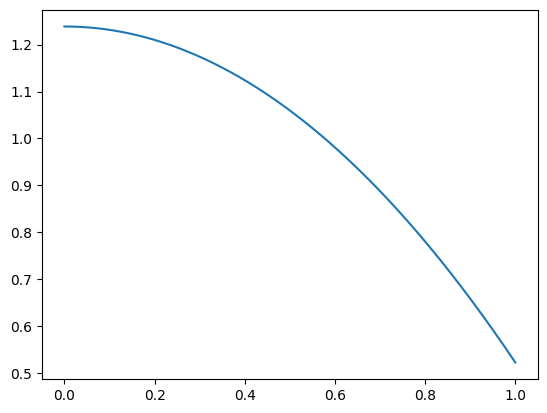

In [34]:
def yearly_approx_approx(x, S2 = -0.477):
    return 1 + S2 * 0.5 * (3 * x**2 - 1)
    # return 0.5*(3*x**2 - 1)

n = 1000
x_list = np.linspace(0, 1, n)
y_list = yearly_approx_approx(x_list)
# integrate over the year using scipy
Intsum = sp.integrate.simps(y_list, x_list)
print("Intsum: ", Intsum)
print(np.sum(y_list) / n)
plt.plot(x_list, y_list)

integral: 2.7547902107173496 Max value: 1.2205409635493671
approx: 2.7647099201055667
sum: 2.754205380424126
--> RMSE: 0.017315408039850485
--> %RMSE: 1.3981031219625275


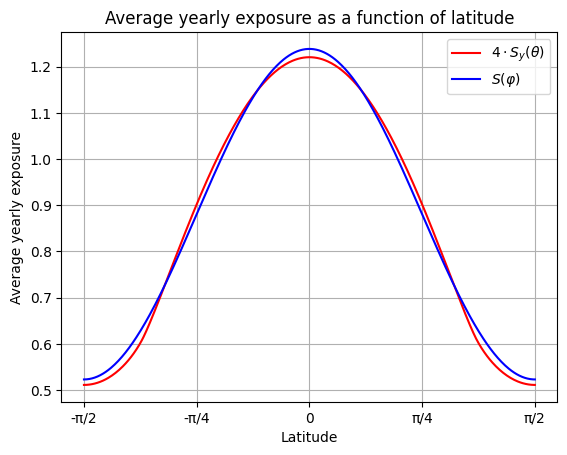

In [39]:
# Integrate over over the year
phi_list = np.linspace(-np.pi/2, np.pi/2, 500)

integral_list = np.zeros(len(phi_list))
yearly_approx_list = np.zeros(len(phi_list))
yearly_exposure_sum_list = np.zeros(len(phi_list))

for i, phi_enum in enumerate(phi_list):
    exposure = sp.integrate.quad(lambda O: daily_exposure(O, phi_enum), 0, 2*np.pi, limit=50)
    integral_list[i] = 4*exposure[0]*(1/(2*np.pi))
    yearly_approx_list[i] = yearly_approx(phi_enum)
    yearly_exposure_sum_list[i] = 4*yearly_exposure_sum(phi_enum)*(1/(2*np.pi))

print("integral:",np.pi*np.sum(integral_list)/len(integral_list), "Max value:", np.max(integral_list))
print("approx:",np.pi*np.sum(yearly_approx_list)/len(yearly_approx_list))
print("sum:",np.pi*np.sum(yearly_exposure_sum_list)/len(yearly_exposure_sum_list))
RootMSE = (np.sum((integral_list - yearly_approx_list)**2)/ np.sum(integral_list))**0.5 
perRMSE = 100*RootMSE/np.max([np.max(integral_list), np.max(yearly_approx_list)])
print("--> RMSE:", RootMSE)
print("--> %RMSE:", perRMSE)

plt.plot(phi_list, integral_list, label = r'$4\cdot S_{y}(\theta)$', color = 'red')
# plt.plot(phi_list, yearly_exposure_sum_list, label = 'Sum', linestyle = '--', color = 'orange')
plt.plot(phi_list, yearly_approx_list, label = r'$S(\varphi)$', color = 'blue')
# plt.plot(phi_list, ((integral_list - yearly_approx_list)**2)**0.5, label = 'Difference', color = 'blue')
plt.legend()
plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], ['-π/2', '-π/4', '0', 'π/4', 'π/2'])
plt.xlabel('Latitude')
plt.ylabel('Average yearly exposure')
plt.title('Average yearly exposure as a function of latitude')
plt.grid()
# plt.gcf().set_size_inches(10, 6)
plt.savefig('Q7_yearly_exposure.png', dpi=300)
plt.show()

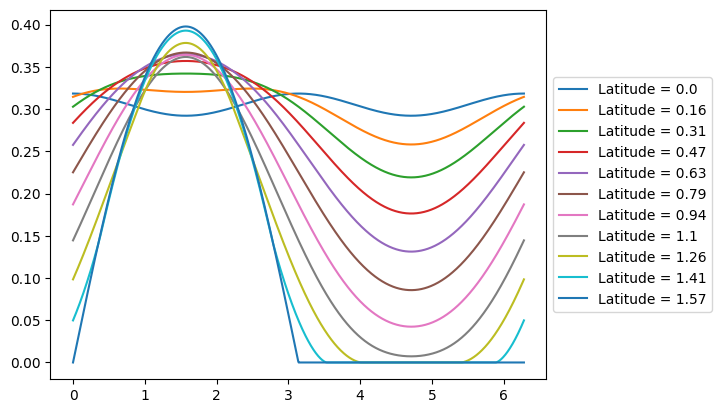

In [36]:
Orbit_list = np.linspace(0, 2*np.pi, 1000)
# Latitude_list = np.linspace(-np.pi, np.pi/2, 15)
Latitude_list = np.linspace(0, np.pi/2, 11)

fig, ax = plt.subplots()
for Latitude in Latitude_list:
    one_latitude = [daily_exposure(Orbit, Latitude) for Orbit in Orbit_list]
    ax.plot(Orbit_list, one_latitude, label = f'Latitude = {np.round(Latitude, 2)}')
# plot legend on the outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [37]:
# no_latitudes = 200
# Orbit_list = np.linspace(0, 2*np.pi, 100)
# # Latitude_list = np.linspace(-np.pi, np.pi/2, 15)
# Latitude_list = np.linspace(0, np.pi/2, no_latitudes)
# no_latitudes_list = np.linspace(0, no_latitudes, no_latitudes)


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# for i, Latitude in enumerate(Latitude_list):
#     one_latitude = [daily_exposure(Orbit, Latitude) for Orbit in Orbit_list]
#     ax.plot(Orbit_list, [i]*len(Orbit_list), one_latitude, label = f'Latitude = {np.round(Latitude, 2)}')
# ax.set_xlabel('Orbit')
# plt.xticks([0, np.pi, 2*np.pi], ['0', 'π', '2π'])
# ax.set_ylabel('Latitude')
# plt.yticks([0, no_latitudes//2, no_latitudes], ['0', 'π/4', 'π/2'])
# ax.set_zlabel('Exposure')
# # rotate the plot
# ax.view_init(30, 25)
# fig.set_size_inches(6,6)
# plt.show()


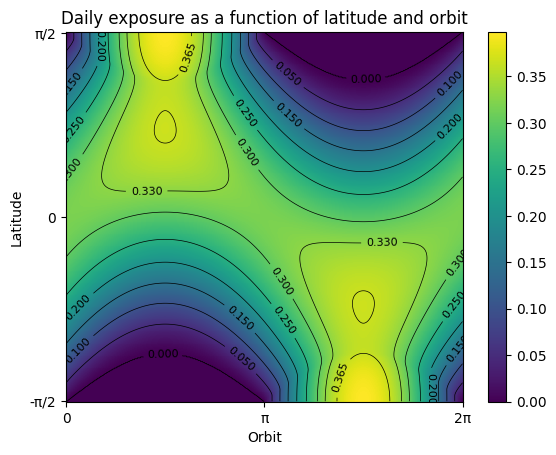

In [38]:
no_latitudes = 400
Latitude_list = np.linspace(-np.pi/2, np.pi/2, no_latitudes)

fig, ax = plt.subplots()
heatmap = np.zeros((len(Latitude_list), len(Orbit_list)))
for i, Latitude in enumerate(Latitude_list):
    one_latitude = [daily_exposure(Orbit, Latitude) for Orbit in Orbit_list]
    heatmap[i] = one_latitude

c = ax.pcolormesh(Orbit_list, Latitude_list, heatmap, shading='auto', cmap='viridis')
fig.colorbar(c, ax=ax)

# Add contour lines
# custom_levels = [0.034,0.069,0.103,0.137,0.171,0.206,0.240,0.274,0.308,0.343, 0.377] # slightly lower peaks than Greg Kopp
# custom_levels = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550] # Slightly lower peaks than Wikipedia
custom_levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.33, 0.365] 
contour = ax.contour(Orbit_list, Latitude_list, heatmap, levels=custom_levels,  colors='black', linewidths=0.5)

# contour = ax.contour(Orbit_list, Latitude_list, heatmap,  colors='black', linewidths=0.5)
ax.clabel(contour, inline=True, fontsize=8)

ax.set_xlabel('Orbit')
plt.xticks([0, np.pi, 2*np.pi], ['0', 'π', '2π'])
ax.set_ylabel('Latitude')
plt.yticks([-np.pi/2, 0, np.pi/2], ['-π/2', '0', 'π/2'])
plt.title('Daily exposure as a function of latitude and orbit')
plt.savefig('Q7_heatmap.png', dpi=300)
plt.show()